In [1]:
# Prepara o ambiente

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [2]:
# Cores
color_receita = '#559E54'
color_despesa = '#D61A46'
color_covid = '#FC7307'
color_relacao = '#341C09'

In [3]:
# Carrega os dados

balrec = pd.read_excel('dados/dados.xlsx', sheet_name='BAL_REC')
baldesp = pd.read_excel('dados/dados.xlsx', sheet_name='BAL_DESP')


# Observações sobre os dados

Os dados da receita abrangem apenas a entidade "prefeitura", excluíndo-se o RPPS.

A despesa abrange a "prefeitura" e a "câmara", excluindo-se o RPPS.

O motivo é que o objetivo é confrontar receitas e despesas que impactam na totalidade de recursos potencialmente voltados para a população, ou seja, o quanto de recurso entrou nos cofres municipais voltados a financiar os serviços públicos e quanto foi efetivamente empregado nesses serviços, tudo sob o ponto de vista da sustentabilidade do município.

A receita é a efetivamente arrecadada, líquida das deduções.

A despesa é a empenhada.

Também é destacado o período da pandemia da COVID-19 (2019 ~ 2022).

# Análises

## Receita versus Despesa Total

In [4]:
# Compara a evolução da receita total com a despesa total
# Prepara os dados
dfr = balrec[['ANO', 'VL_ARRECADADO']].groupby(by='ANO', as_index=False).sum()
dfd = baldesp[['ANO', 'VL_EMPENHADO']].groupby(by='ANO', as_index=False).sum()
df = pd.merge(dfr, dfd, on='ANO')
df

,ANO,VL_ARRECADADO,VL_EMPENHADO
0,2013,15231708.95,13875601.60
1,2014,15728040.10,15839875.21
2,2015,16277876.63,16429547.64
3,2016,18979000.22,18180968.95
4,2017,20063584.89,21330532.39
5,2018,23053204.09,22569281.11
6,2019,24496171.67,25044401.06
7,2020,27223237.97,25998366.31
8,2021,32988886.13,29492035.28
9,2022,38899986.69,41764795.78


### Valores absolutos

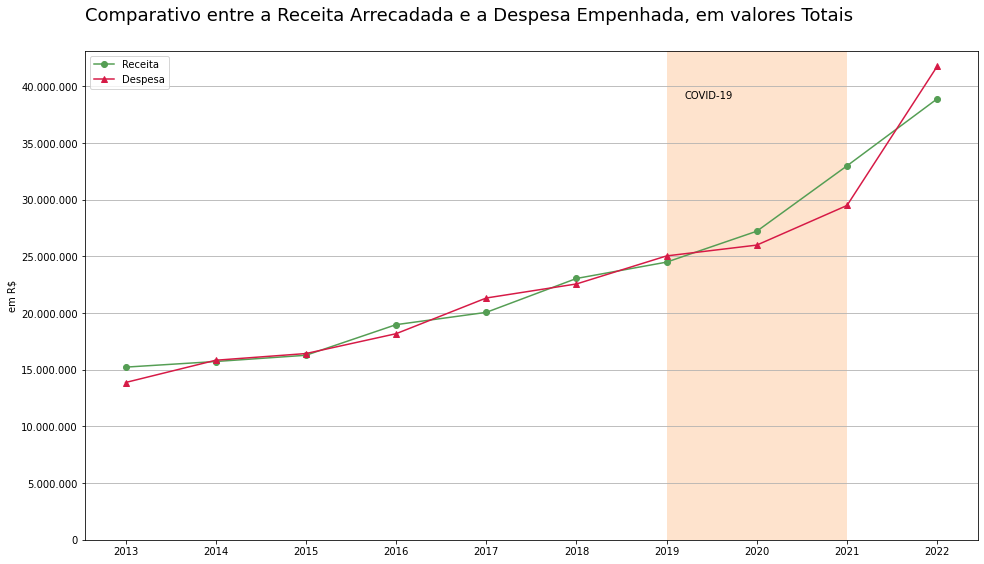

In [5]:
# Prepara o gráfico
plt.plot(df['ANO'], df['VL_ARRECADADO'], label='Receita', color=color_receita, marker='o')
plt.plot(df['ANO'], df['VL_EMPENHADO'], label='Despesa', color=color_despesa, marker='^')

# Título
plt.title('Comparativo entre a Receita Arrecadada e a Despesa Empenhada, em valores Totais', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'])

# Eixo y
plt.ylabel('em R$')
plt.gca().yaxis.grid()
plt.ylim(0, plt.ylim()[1])

# Formata o eixo y em milhares
yfmt = mtick.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().yaxis.set_major_formatter(yfmt)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, df['VL_ARRECADADO'].max()))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/valores_receita_despesa_total.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

### Valores relativos

In [6]:
# Compara a relação entre a receita total e a despesa total
# Prepara os dados
df['RELACAO'] = round(df['VL_EMPENHADO'] / df['VL_ARRECADADO'], 2)
# Acrescenta média
df['MEDIA'] = df['RELACAO'].mean()
df

,ANO,VL_ARRECADADO,VL_EMPENHADO,RELACAO,MEDIA
0,2013,15231708.95,13875601.60,0.91,0.987
1,2014,15728040.10,15839875.21,1.01,0.987
2,2015,16277876.63,16429547.64,1.01,0.987
3,2016,18979000.22,18180968.95,0.96,0.987
4,2017,20063584.89,21330532.39,1.06,0.987
5,2018,23053204.09,22569281.11,0.98,0.987
6,2019,24496171.67,25044401.06,1.02,0.987
7,2020,27223237.97,25998366.31,0.96,0.987
8,2021,32988886.13,29492035.28,0.89,0.987
9,2022,38899986.69,41764795.78,1.07,0.987


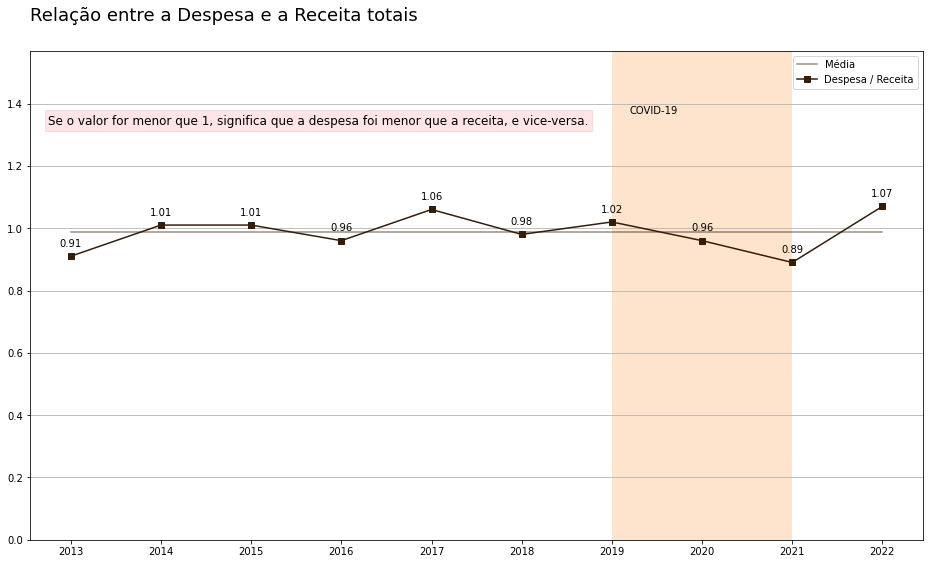

In [7]:
# Prepara o gráfico
plt.plot(df['ANO'], df['MEDIA'], label='Média', color=color_relacao, alpha=0.5)
plt.plot(df['ANO'], df['RELACAO'], label='Despesa / Receita', color=color_relacao, marker='s')

# Título
plt.title('Relação entre a Despesa e a Receita totais', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'].unique())

# Eixo y
plt.gca().yaxis.grid()
plt.ylim(0, df['RELACAO'].max()+0.5)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, plt.ylim()[1]-0.2))

# Adiciona os rótulos aos pontos de dados
for x, y in zip(df['ANO'], df['RELACAO']):
    label = f'{y}'
    plt.annotate(label, (x, y), textcoords='offset points', xytext=(0, 10), ha='center')
    
# Coloca uma anotação sobre a interpretação dos pontos de dados
plt.annotate('Se o valor for menor que 1, significa que a despesa foi menor que a receita, e vice-versa.', 
             xy=(plt.xlim()[0]+0.2, plt.ylim()[1]*0.85), 
             fontsize=12, 
             bbox=dict(boxstyle='square', facecolor='red', edgecolor='red', alpha=0.1))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/relacao_receita_despesa_total.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

## Receita Corrente versus Despesa Corrente

In [8]:
# Compara a evolução da receita corrente com a despesa corrente
# Prepara os dados
dfr = balrec[balrec['CD_CONTA_SG'].astype(str).str.startswith(('1', '91'))]
dfr = dfr[['ANO', 'VL_ARRECADADO']].groupby(by='ANO', as_index=False).sum()
dfd = baldesp[baldesp['CD_ELEMENTO'].str.startswith('3')]
dfd = dfd[['ANO', 'VL_EMPENHADO']].groupby(by='ANO', as_index=False).sum()
df = pd.merge(dfr, dfd, on='ANO')
df

,ANO,VL_ARRECADADO,VL_EMPENHADO
0,2013,14342667.69,13115782.40
1,2014,15180578.06,14945742.35
2,2015,15710160.66,15352527.89
3,2016,18109447.27,16889751.12
4,2017,19253519.64,19186035.96
5,2018,22607754.21,20494566.69
6,2019,23972264.79,22857760.75
7,2020,26636264.97,24060040.37
8,2021,32750136.13,27133591.11
9,2022,37166790.51,36292325.56


### Valores absolutos

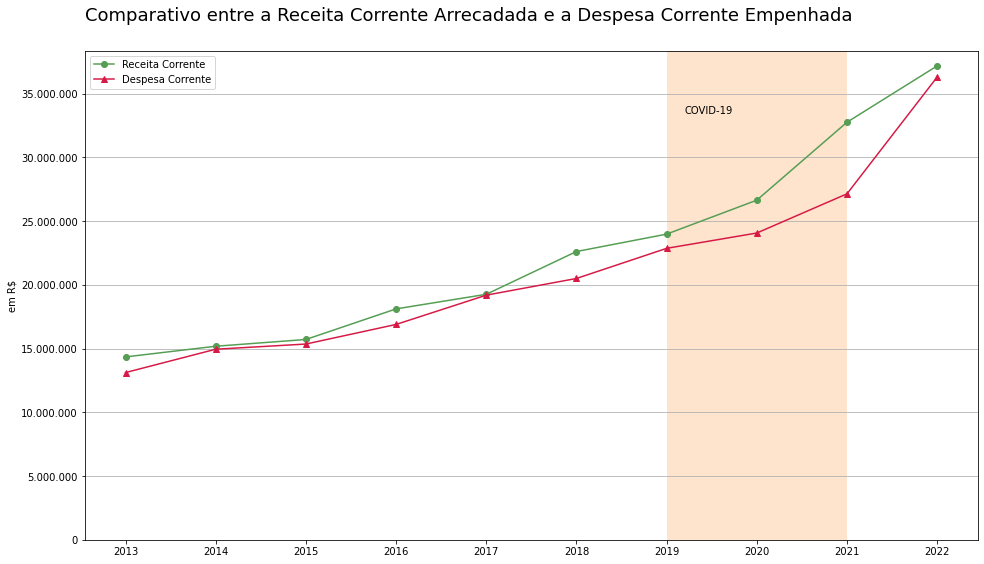

In [9]:
# Prepara o gráfico
plt.plot(df['ANO'], df['VL_ARRECADADO'], label='Receita Corrente', color=color_receita, marker='o')
plt.plot(df['ANO'], df['VL_EMPENHADO'], label='Despesa Corrente', color=color_despesa, marker='^')

# Título
plt.title('Comparativo entre a Receita Corrente Arrecadada e a Despesa Corrente Empenhada', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'])

# Eixo y
plt.ylabel('em R$')
plt.gca().yaxis.grid()
plt.ylim(0, plt.ylim()[1])

# Formata o eixo y em milhares
yfmt = mtick.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().yaxis.set_major_formatter(yfmt)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, df['VL_ARRECADADO'].max()*0.9))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/valores_receita_despesa_corrente.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

### Valores relativos

In [10]:
# Compara a relação entre a receita total e a despesa total
# Prepara os dados
df['RELACAO'] = round(df['VL_EMPENHADO'] / df['VL_ARRECADADO'], 2)
# Acrescenta média
df['MEDIA'] = df['RELACAO'].mean()
df

,ANO,VL_ARRECADADO,VL_EMPENHADO,RELACAO,MEDIA
0,2013,14342667.69,13115782.40,0.91,0.937
1,2014,15180578.06,14945742.35,0.98,0.937
2,2015,15710160.66,15352527.89,0.98,0.937
3,2016,18109447.27,16889751.12,0.93,0.937
4,2017,19253519.64,19186035.96,1.00,0.937
5,2018,22607754.21,20494566.69,0.91,0.937
6,2019,23972264.79,22857760.75,0.95,0.937
7,2020,26636264.97,24060040.37,0.90,0.937
8,2021,32750136.13,27133591.11,0.83,0.937
9,2022,37166790.51,36292325.56,0.98,0.937


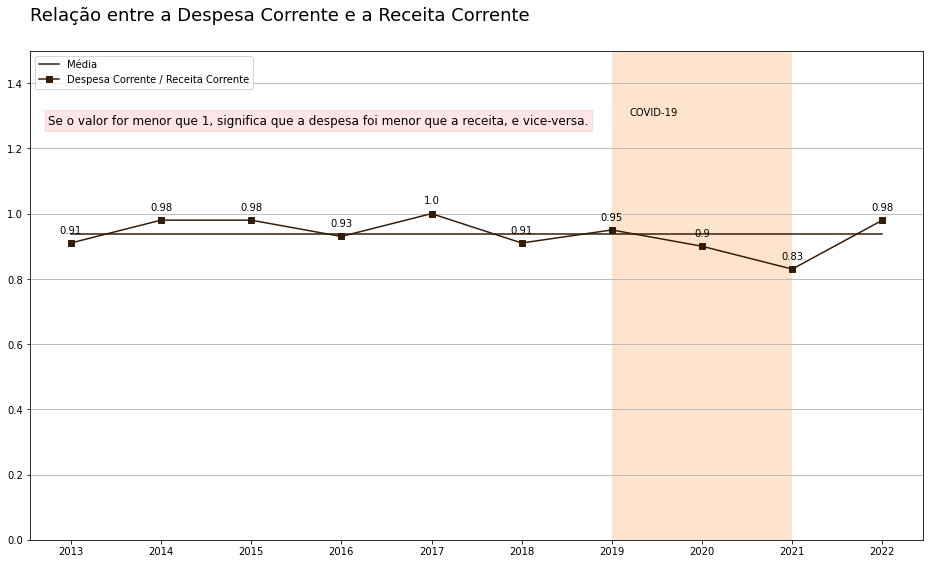

In [11]:
# Prepara o gráfico
plt.plot(df['ANO'], df['MEDIA'], label='Média', color=color_relacao)
plt.plot(df['ANO'], df['RELACAO'], label='Despesa Corrente / Receita Corrente', color=color_relacao, marker='s')

# Título
plt.title('Relação entre a Despesa Corrente e a Receita Corrente', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'].unique())

# Eixo y
plt.gca().yaxis.grid()
plt.ylim(0, df['RELACAO'].max()+0.5)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, plt.ylim()[1]-0.2))

# Adiciona os rótulos aos pontos de dados
for x, y in zip(df['ANO'], df['RELACAO']):
    label = f'{y}'
    plt.annotate(label, (x, y), textcoords='offset points', xytext=(0, 10), ha='center')
    
# Coloca uma anotação sobre a interpretação dos pontos de dados
plt.annotate('Se o valor for menor que 1, significa que a despesa foi menor que a receita, e vice-versa.', 
             xy=(plt.xlim()[0]+0.2, plt.ylim()[1]*0.85), 
             fontsize=12, 
             bbox=dict(boxstyle='square', facecolor='red', edgecolor='red', alpha=0.1))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/relacao_receita_despesa_corrente.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

## Receita Corrente versus Despesa com Pessoal e Encargos Sociais

In [12]:
# Compara a evolução da receita corrente com a despesa de pessoal
# Prepara os dados
dfr = balrec[balrec['CD_CONTA_SG'].astype(str).str.startswith(('1', '91'))]
dfr = dfr[['ANO', 'VL_ARRECADADO']].groupby(by='ANO', as_index=False).sum()
dfd = baldesp[baldesp['CD_ELEMENTO'].str.startswith('3.1')]
dfd = dfd[['ANO', 'VL_EMPENHADO']].groupby(by='ANO', as_index=False).sum()
df = pd.merge(dfr, dfd, on='ANO')
df

,ANO,VL_ARRECADADO,VL_EMPENHADO
0,2013,14342667.69,8532776.99
1,2014,15180578.06,9519423.59
2,2015,15710160.66,9847738.01
3,2016,18109447.27,10712921.62
4,2017,19253519.64,11539302.81
5,2018,22607754.21,12633283.26
6,2019,23972264.79,13871749.33
7,2020,26636264.97,15547133.75
8,2021,32750136.13,15112352.95
9,2022,37166790.51,18642934.73


### Valores absolutos

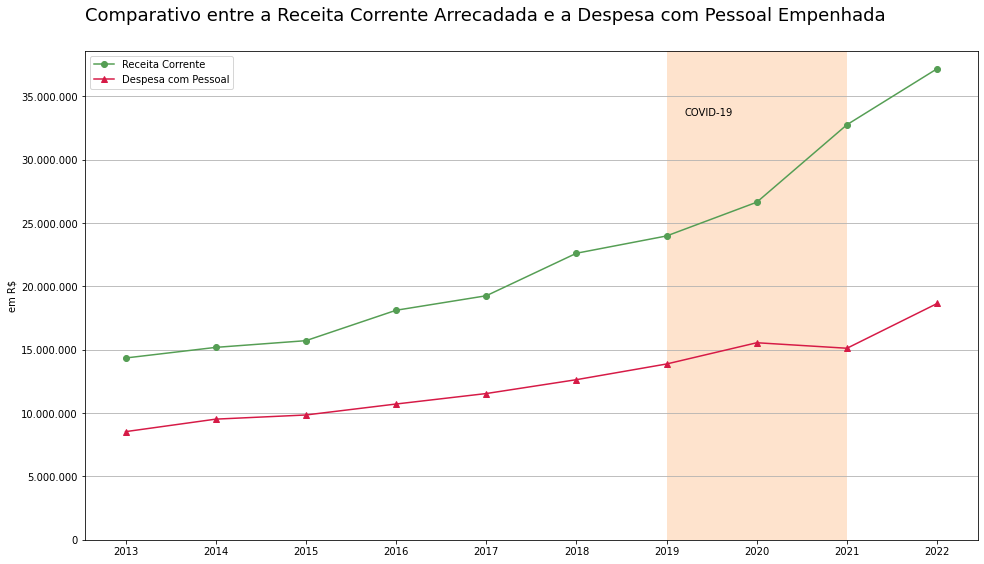

In [13]:
# Prepara o gráfico
plt.plot(df['ANO'], df['VL_ARRECADADO'], label='Receita Corrente', color=color_receita, marker='o')
plt.plot(df['ANO'], df['VL_EMPENHADO'], label='Despesa com Pessoal', color=color_despesa, marker='^')

# Título
plt.title('Comparativo entre a Receita Corrente Arrecadada e a Despesa com Pessoal Empenhada', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'])

# Eixo y
plt.ylabel('em R$')
plt.gca().yaxis.grid()
plt.ylim(0, plt.ylim()[1])

# Formata o eixo y em milhares
yfmt = mtick.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().yaxis.set_major_formatter(yfmt)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, df['VL_ARRECADADO'].max()*0.9))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/valores_receita_corrente_despesa_pessoal.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

### Valores relativos

In [14]:
# Compara a relação entre a receita total e a despesa total
# Prepara os dados
df['RELACAO'] = round(df['VL_EMPENHADO'] / df['VL_ARRECADADO'], 2)
# Acrescenta média
df['MEDIA'] = df['RELACAO'].mean()
df

,ANO,VL_ARRECADADO,VL_EMPENHADO,RELACAO,MEDIA
0,2013,14342667.69,8532776.99,0.59,0.572
1,2014,15180578.06,9519423.59,0.63,0.572
2,2015,15710160.66,9847738.01,0.63,0.572
3,2016,18109447.27,10712921.62,0.59,0.572
4,2017,19253519.64,11539302.81,0.60,0.572
5,2018,22607754.21,12633283.26,0.56,0.572
6,2019,23972264.79,13871749.33,0.58,0.572
7,2020,26636264.97,15547133.75,0.58,0.572
8,2021,32750136.13,15112352.95,0.46,0.572
9,2022,37166790.51,18642934.73,0.50,0.572


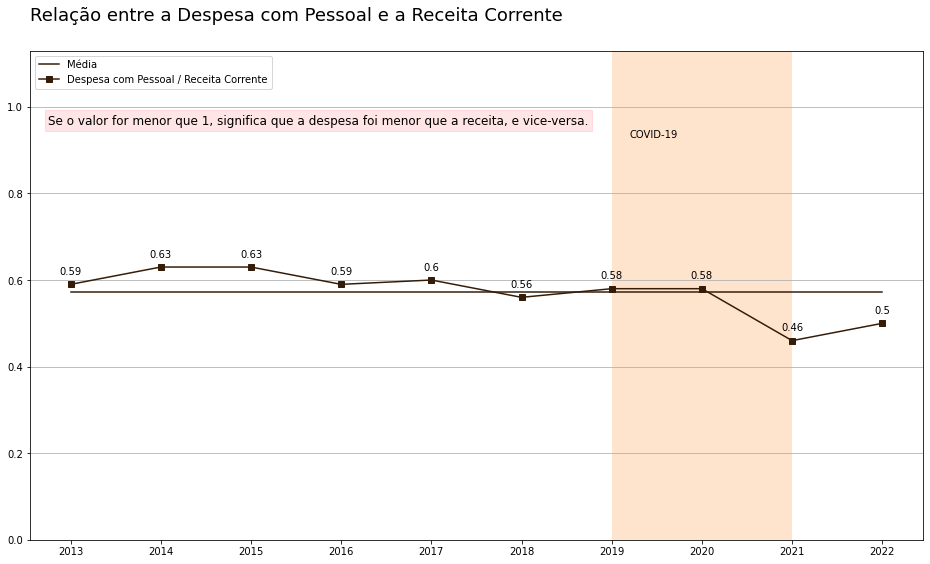

In [15]:
# Prepara o gráfico
plt.plot(df['ANO'], df['MEDIA'], label='Média', color=color_relacao)
plt.plot(df['ANO'], df['RELACAO'], label='Despesa com Pessoal / Receita Corrente', color=color_relacao, marker='s')

# Título
plt.title('Relação entre a Despesa com Pessoal e a Receita Corrente', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'].unique())

# Eixo y
plt.gca().yaxis.grid()
plt.ylim(0, df['RELACAO'].max()+0.5)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, plt.ylim()[1]-0.2))

# Adiciona os rótulos aos pontos de dados
for x, y in zip(df['ANO'], df['RELACAO']):
    label = f'{y}'
    plt.annotate(label, (x, y), textcoords='offset points', xytext=(0, 10), ha='center')
    
# Coloca uma anotação sobre a interpretação dos pontos de dados
plt.annotate('Se o valor for menor que 1, significa que a despesa foi menor que a receita, e vice-versa.', 
             xy=(plt.xlim()[0]+0.2, plt.ylim()[1]*0.85), 
             fontsize=12, 
             bbox=dict(boxstyle='square', facecolor='red', edgecolor='red', alpha=0.1))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/relacao_receita_corrente_despesa_pessoal.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

## Receita por categoria

### Arrecadação própria

Engloba a receita corrente exceto as transferências correntes

In [16]:
# Preparação dos dados
df = balrec[balrec['CD_CONTA_SG'].astype(str).str.startswith(('11', '12', '13', '14', '15', '16', '18', '19', '911', '912', '913', '914', '915', '916', '918', '919'))]
df = df[['ANO', 'VL_ARRECADADO']].groupby(by='ANO', as_index=False).sum()
df

,ANO,VL_ARRECADADO
0,2013,1484415.15
1,2014,1552737.09
2,2015,1850654.69
3,2016,1940845.84
4,2017,2483404.39
5,2018,3500449.95
6,2019,3378372.99
7,2020,3229245.69
8,2021,4016295.11
9,2022,5549436.45


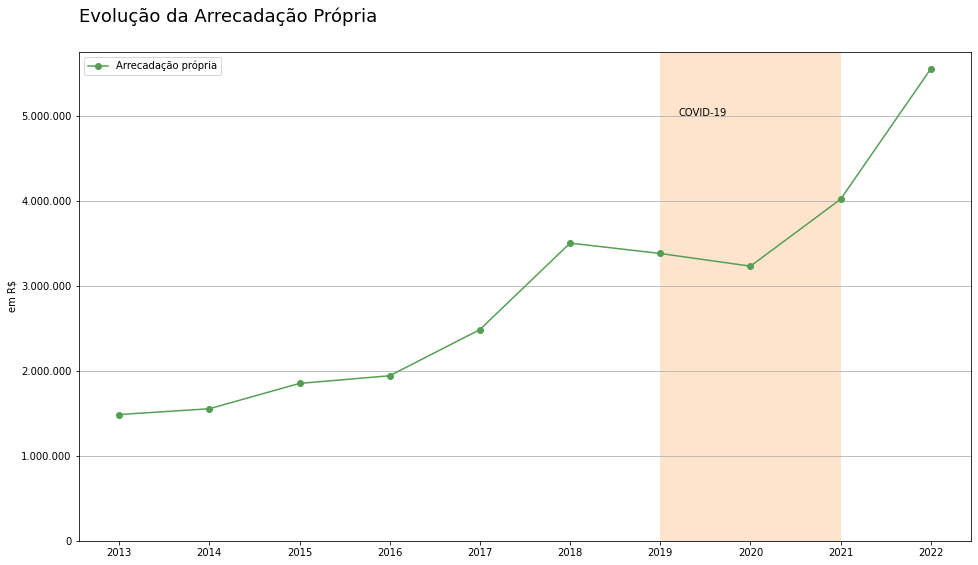

In [17]:
# Prepara o gráfico
plt.plot(df['ANO'], df['VL_ARRECADADO'], label='Arrecadação própria', color=color_receita, marker='o')


# Título
plt.title('Evolução da Arrecadação Própria', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'])

# Eixo y
plt.ylabel('em R$')
plt.gca().yaxis.grid()
plt.ylim(0, plt.ylim()[1])

# Formata o eixo y em milhares
yfmt = mtick.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().yaxis.set_major_formatter(yfmt)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, df['VL_ARRECADADO'].max()*0.9))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/evolucao_arrecadacao_propria.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

### Receita de transferências

Trasnferências correntes e de capital recebidas da União, Estado, Fundeb e outras origens.

In [18]:
# Preparação dos dados
df = balrec[balrec['CD_CONTA_SG'].astype(str).str.startswith(('17', '24', '917', '924'))]
df = df[['ANO', 'VL_ARRECADADO']].groupby(by='ANO', as_index=False).sum()
df

,ANO,VL_ARRECADADO
0,2013,13719786.41
1,2014,14115863.42
2,2015,14398255.97
3,2016,16999786.73
4,2017,17217615.25
5,2018,19551221.90
6,2019,21117798.68
7,2020,23873792.28
8,2021,28972591.02
9,2022,33312800.24


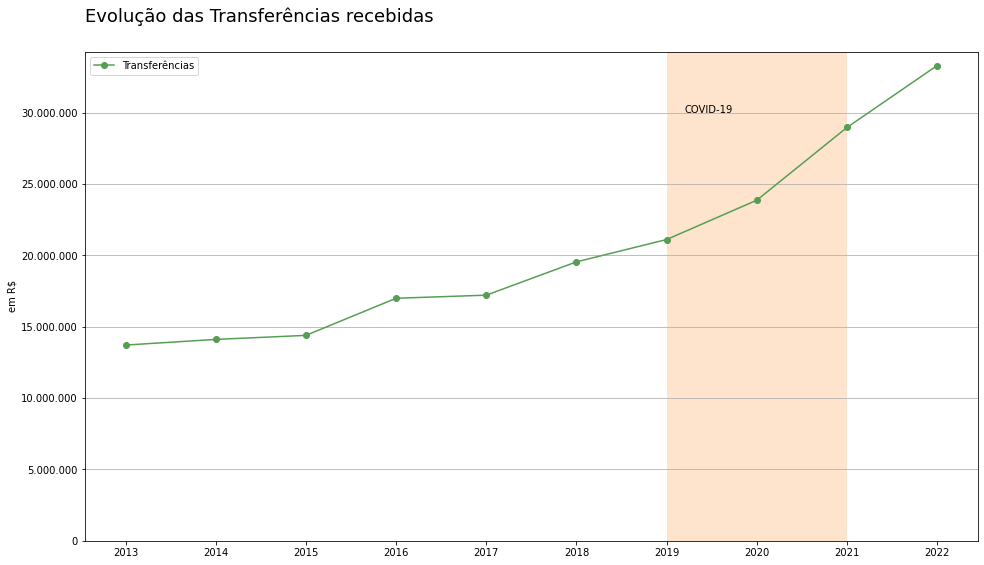

In [19]:
# Prepara o gráfico
plt.plot(df['ANO'], df['VL_ARRECADADO'], label='Transferências', color=color_receita, marker='o')


# Título
plt.title('Evolução das Transferências recebidas', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'])

# Eixo y
plt.ylabel('em R$')
plt.gca().yaxis.grid()
plt.ylim(0, plt.ylim()[1])

# Formata o eixo y em milhares
yfmt = mtick.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().yaxis.set_major_formatter(yfmt)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, df['VL_ARRECADADO'].max()*0.9))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/evolucao_transferencias.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

### Receita de transferências correntes

Trasnferências correntes recebidas da União, Estado, Fundeb e outras origens.

In [20]:
# Preparação dos dados
df = balrec[balrec['CD_CONTA_SG'].astype(str).str.startswith(('17', '917'))]
df = df[['ANO', 'VL_ARRECADADO']].groupby(by='ANO', as_index=False).sum()
df

,ANO,VL_ARRECADADO
0,2013,12858252.54
1,2014,13627840.97
2,2015,13859505.97
3,2016,16168601.43
4,2017,16770115.25
5,2018,19107304.26
6,2019,20593891.80
7,2020,23407019.28
8,2021,28733841.02
9,2022,31617354.06


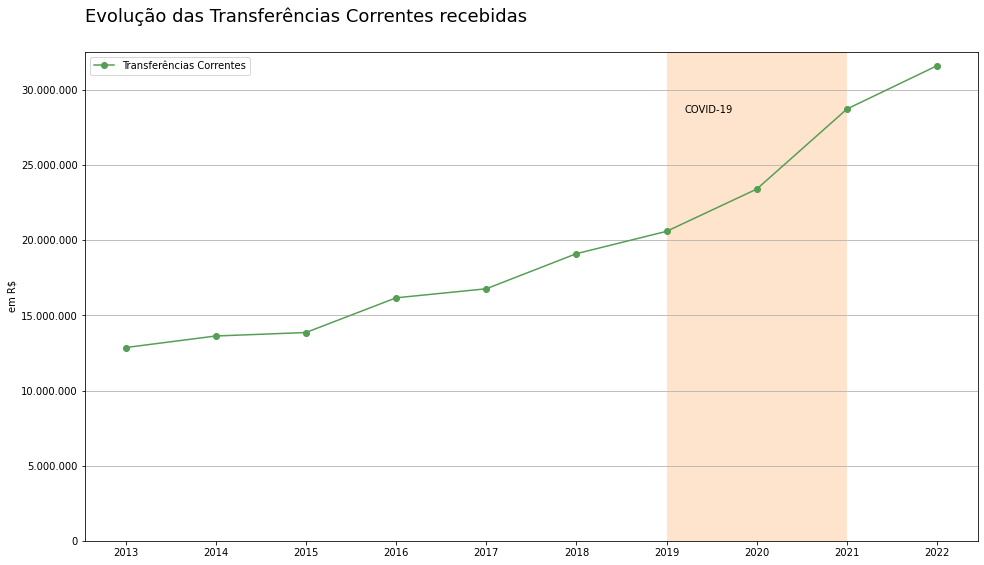

In [21]:
# Prepara o gráfico
plt.plot(df['ANO'], df['VL_ARRECADADO'], label='Transferências Correntes', color=color_receita, marker='o')


# Título
plt.title('Evolução das Transferências Correntes recebidas', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'])

# Eixo y
plt.ylabel('em R$')
plt.gca().yaxis.grid()
plt.ylim(0, plt.ylim()[1])

# Formata o eixo y em milhares
yfmt = mtick.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().yaxis.set_major_formatter(yfmt)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, df['VL_ARRECADADO'].max()*0.9))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/evolucao_transferencias_correntes.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

## Despesas por categoria

### Pessoal e Encargos Sociais

In [22]:
# Prepara os dados
df = baldesp[baldesp['CD_ELEMENTO'].str.startswith('3.1')]
df = df[['ANO', 'VL_EMPENHADO']].groupby(by='ANO', as_index=False).sum()
df

,ANO,VL_EMPENHADO
0,2013,8532776.99
1,2014,9519423.59
2,2015,9847738.01
3,2016,10712921.62
4,2017,11539302.81
5,2018,12633283.26
6,2019,13871749.33
7,2020,15547133.75
8,2021,15112352.95
9,2022,18642934.73


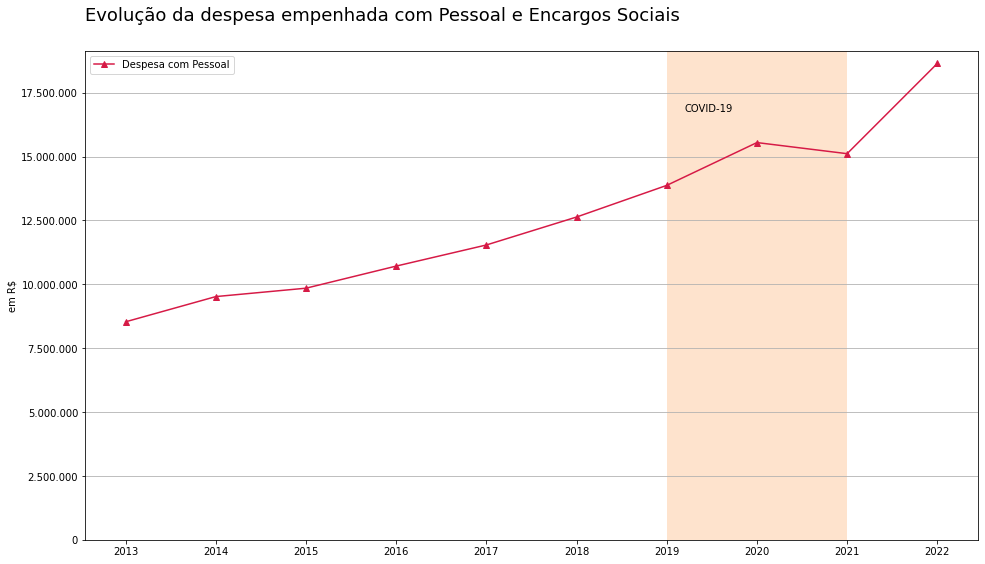

In [23]:
# Prepara o gráfico
plt.plot(df['ANO'], df['VL_EMPENHADO'], label='Despesa com Pessoal', color=color_despesa, marker='^')

# Título
plt.title('Evolução da despesa empenhada com Pessoal e Encargos Sociais', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'])

# Eixo y
plt.ylabel('em R$')
plt.gca().yaxis.grid()
plt.ylim(0, plt.ylim()[1])

# Formata o eixo y em milhares
yfmt = mtick.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().yaxis.set_major_formatter(yfmt)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, df['VL_EMPENHADO'].max()*0.9))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/evolucao_pessoal.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

### Despesas de Custeio, exceto de pessoal

In [24]:
# Prepara os dados
df = baldesp[baldesp['CD_ELEMENTO'].str.startswith('3.3')]
df = df[['ANO', 'VL_EMPENHADO']].groupby(by='ANO', as_index=False).sum()
df

,ANO,VL_EMPENHADO
0,2013,4576974.29
1,2014,5426053.59
2,2015,5504789.88
3,2016,6176829.50
4,2017,7646733.15
5,2018,7861283.43
6,2019,8986011.42
7,2020,8512906.62
8,2021,12021238.16
9,2022,17649390.83


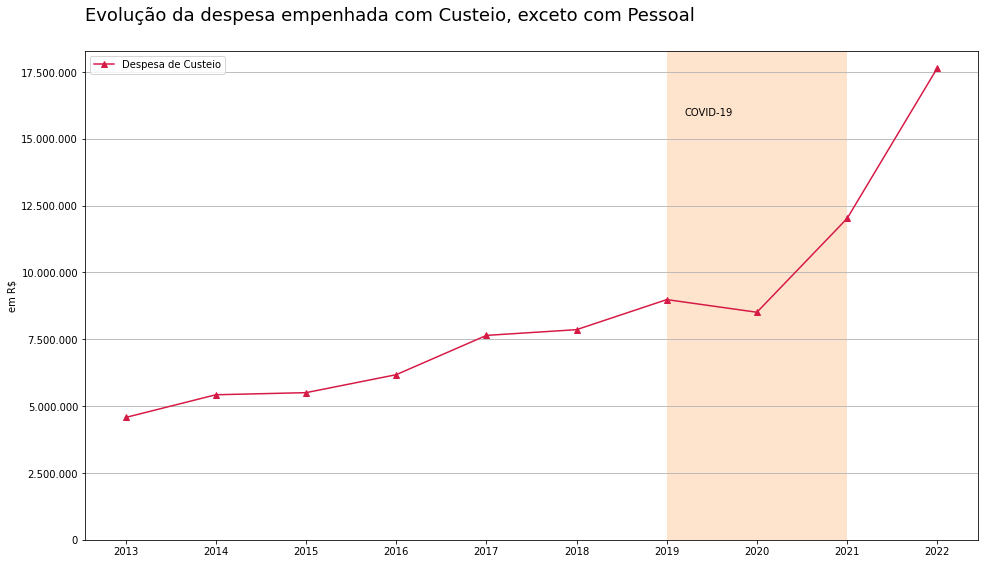

In [25]:
# Prepara o gráfico
plt.plot(df['ANO'], df['VL_EMPENHADO'], label='Despesa de Custeio', color=color_despesa, marker='^')

# Título
plt.title('Evolução da despesa empenhada com Custeio, exceto com Pessoal', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'])

# Eixo y
plt.ylabel('em R$')
plt.gca().yaxis.grid()
plt.ylim(0, plt.ylim()[1])

# Formata o eixo y em milhares
yfmt = mtick.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().yaxis.set_major_formatter(yfmt)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, df['VL_EMPENHADO'].max()*0.9))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/evolucao_custeio.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

### Investimentos

In [26]:
# Prepara os dados
df = baldesp[baldesp['CD_ELEMENTO'].str.startswith('4.4', '4.5')]
df = df[['ANO', 'VL_EMPENHADO']].groupby(by='ANO', as_index=False).sum()
df

,ANO,VL_EMPENHADO
0,2013,603484.64
1,2014,762410.36
2,2015,972026.59
3,2016,1175093.59
4,2017,2021022.67
5,2018,1945067.42
6,2019,2052378.43
7,2020,1797352.22
8,2021,2211098.81
9,2022,5316060.54


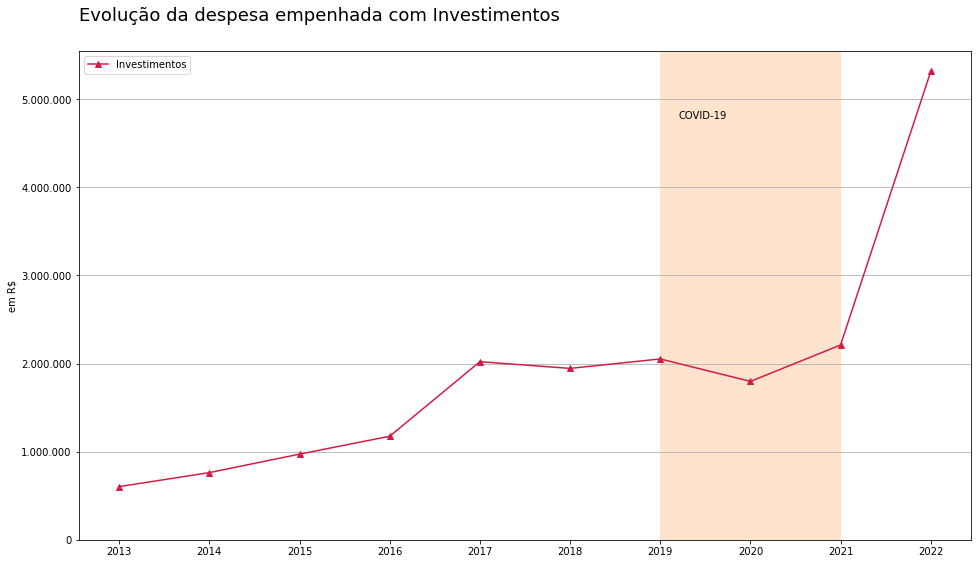

In [27]:
# Prepara o gráfico
plt.plot(df['ANO'], df['VL_EMPENHADO'], label='Investimentos', color=color_despesa, marker='^')

# Título
plt.title('Evolução da despesa empenhada com Investimentos', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'])

# Eixo y
plt.ylabel('em R$')
plt.gca().yaxis.grid()
plt.ylim(0, plt.ylim()[1])

# Formata o eixo y em milhares
yfmt = mtick.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().yaxis.set_major_formatter(yfmt)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, df['VL_EMPENHADO'].max()*0.9))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/evolucao_investimento.png', bbox_inches = "tight", facecolor='white', edgecolor='black')

### Amortização e Juros da Dívida

In [28]:
# Prepara os dados
df = baldesp[baldesp['CD_ELEMENTO'].str.startswith('4.6', '3.2')]
df = df[['ANO', 'VL_EMPENHADO']].groupby(by='ANO', as_index=False).sum()
df

,ANO,VL_EMPENHADO
0,2013,156334.56
1,2014,131722.50
2,2015,104993.16
3,2016,116124.24
4,2017,123473.76
5,2018,129647.00
6,2019,134261.88
7,2020,140973.72
8,2021,147345.36
9,2022,156409.68


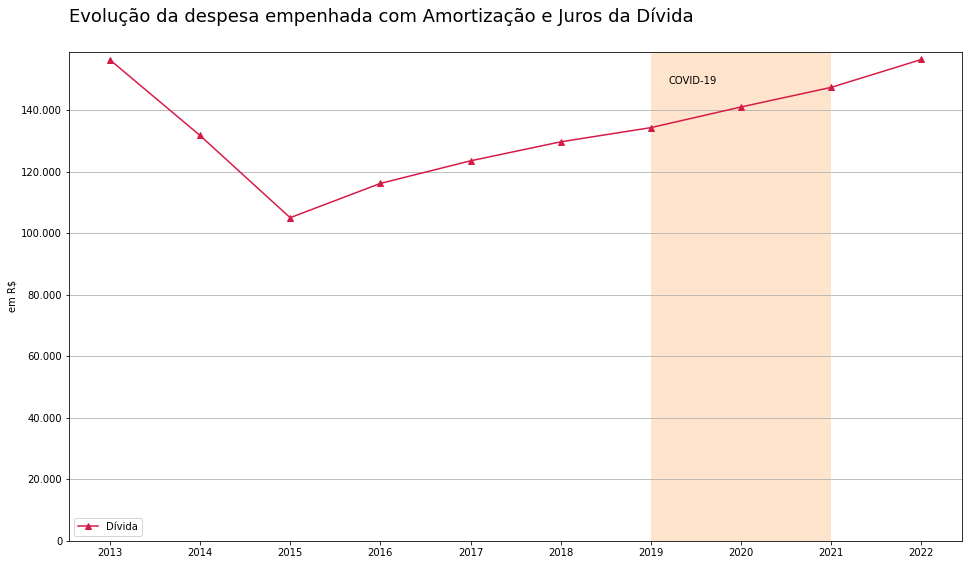

In [29]:
# Prepara o gráfico
plt.plot(df['ANO'], df['VL_EMPENHADO'], label='Dívida', color=color_despesa, marker='^')

# Título
plt.title('Evolução da despesa empenhada com Amortização e Juros da Dívida', loc='left', pad=30, fontsize=18)

# Eixo x
plt.xticks(df['ANO'])

# Eixo y
plt.ylabel('em R$')
plt.gca().yaxis.grid()
plt.ylim(0, plt.ylim()[1])

# Formata o eixo y em milhares
yfmt = mtick.FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().yaxis.set_major_formatter(yfmt)

# Desenha um retângulo no período da pandemia.
import matplotlib.patches as patches
plt.gca().add_patch(patches.Rectangle((2019, 0), 2, plt.ylim()[1], facecolor=color_covid, alpha=0.2))

# Coloca uma anotação
plt.annotate('COVID-19', xy=(2019, plt.ylim()[1]), xytext=(2019+0.2, df['VL_EMPENHADO'].max()*0.95))

# Legenda
plt.legend()

# Prepara uma figura para encapsular o gráfico
fig = plt.gcf()
fig.set_size_inches(16, 9)

# Exibe o gráfico
plt.show()

# Salva o gráfico
fig.savefig('img/evolucao_divida.png', bbox_inches = "tight", facecolor='white', edgecolor='black')